# Unit 3 - Lesson 5 - Drill - Improve This Gradient Boost Model

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

Weak learner 0 R^2: -21.86595826514709
Weak learner 20 R^2: -0.0026192923008196978
Weak learner 40 R^2: -0.0016748172727345523
Weak learner 60 R^2: -0.0014818633549411597
Weak learner 80 R^2: -0.0012578370480089696
Weak learner 100 R^2: -0.0007136861925911564


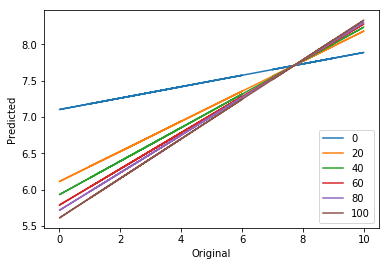

Overall R^2:
0.5282873581794292


In [2]:
# Working with the European Social Survey data again.
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Define outcome and predictors.
y = df['happy']
X = df.loc[:, ~df.columns.isin(['happy', 'cntry'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Store values from loops.
preds = pd.DataFrame()
labels = []

uniquex = df['happy'].unique()

# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.
for m in range(0, 101):
    
    # Initialize and fit the tree. Set the max depth to 2.
    decision_tree = tree.DecisionTreeRegressor(max_depth=2)
    decision_tree.fit(X,y)
    
    # Get and store predicted values.
    pred = decision_tree.predict(X)
    preds['pred{}'.format(m)] = pred
    
    # Residuals.
    y = y - pred

    # Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X, y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(df['happy'], bestpred, 1))(uniquex))
       
plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(df['happy'], predicted)[0, 1])

In [3]:
X.head()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,sclmeet,sclact,gndr,agea,partner,CH,CZ,DE,ES,NO,SE
0,5.0,6,3.0,3.0,10.0,5.0,5.0,4.0,2.0,60.0,1.0,1,0,0,0,0,0
1,25.0,6,6.0,5.0,7.0,5.0,3.0,2.0,2.0,59.0,1.0,1,0,0,0,0,0
2,26.0,6,1.0,8.0,8.0,8.0,6.0,3.0,1.0,24.0,2.0,1,0,0,0,0,0
3,28.0,6,4.0,6.0,6.0,7.0,6.0,2.0,2.0,64.0,1.0,1,0,0,0,0,0
4,29.0,6,5.0,6.0,7.0,5.0,7.0,2.0,2.0,55.0,1.0,1,0,0,0,0,0


In [4]:
preds.tail()

,pred0,pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,...,pred91,pred92,pred93,pred94,pred95,pred96,pred97,pred98,pred99,pred100
8142,7.466039,0.198944,-0.029901,-0.023815,-0.090226,-0.273180,-0.085725,-0.013159,-0.008157,-0.183307,...,-0.022697,-0.013231,0.005946,0.001085,-0.008118,0.002566,-0.010875,0.011030,-0.001848,-0.001019
8143,7.466039,0.198944,-0.029901,-0.023815,0.292190,-0.000255,0.136552,-0.013159,-0.008157,-0.183307,...,-0.022697,-0.013231,0.005946,0.001085,-0.008118,0.002566,-0.010875,0.011030,-0.001848,-0.001019
8144,8.168311,-0.538390,-0.029901,-0.023815,-0.235860,-0.000255,-0.120018,-0.013159,-0.008157,-0.002564,...,0.019005,-0.013231,0.005946,0.001085,-0.008118,0.002566,-0.010875,-0.001109,-0.001848,-0.001019
8145,8.168311,0.198944,-0.029901,-0.023815,0.104414,-0.000255,0.136552,-0.013159,-0.008157,0.096519,...,0.019005,-0.013231,0.005946,0.001085,-0.008118,0.002566,-0.010875,0.011030,-0.001848,-0.001019
8146,8.168311,0.198944,-0.029901,-0.023815,-0.235860,-0.000255,0.136552,-0.013159,-0.008157,0.096519,...,0.019005,-0.013231,0.005946,0.001085,-0.008118,0.002566,-0.010875,0.011030,-0.001848,-0.001019


In [5]:
pred

array([ 0.23542785,  0.23542785,  0.23542785, ..., -0.00101939,
       -0.00101939, -0.00101939])

One strongish learner R^2: 0.06711108322936521


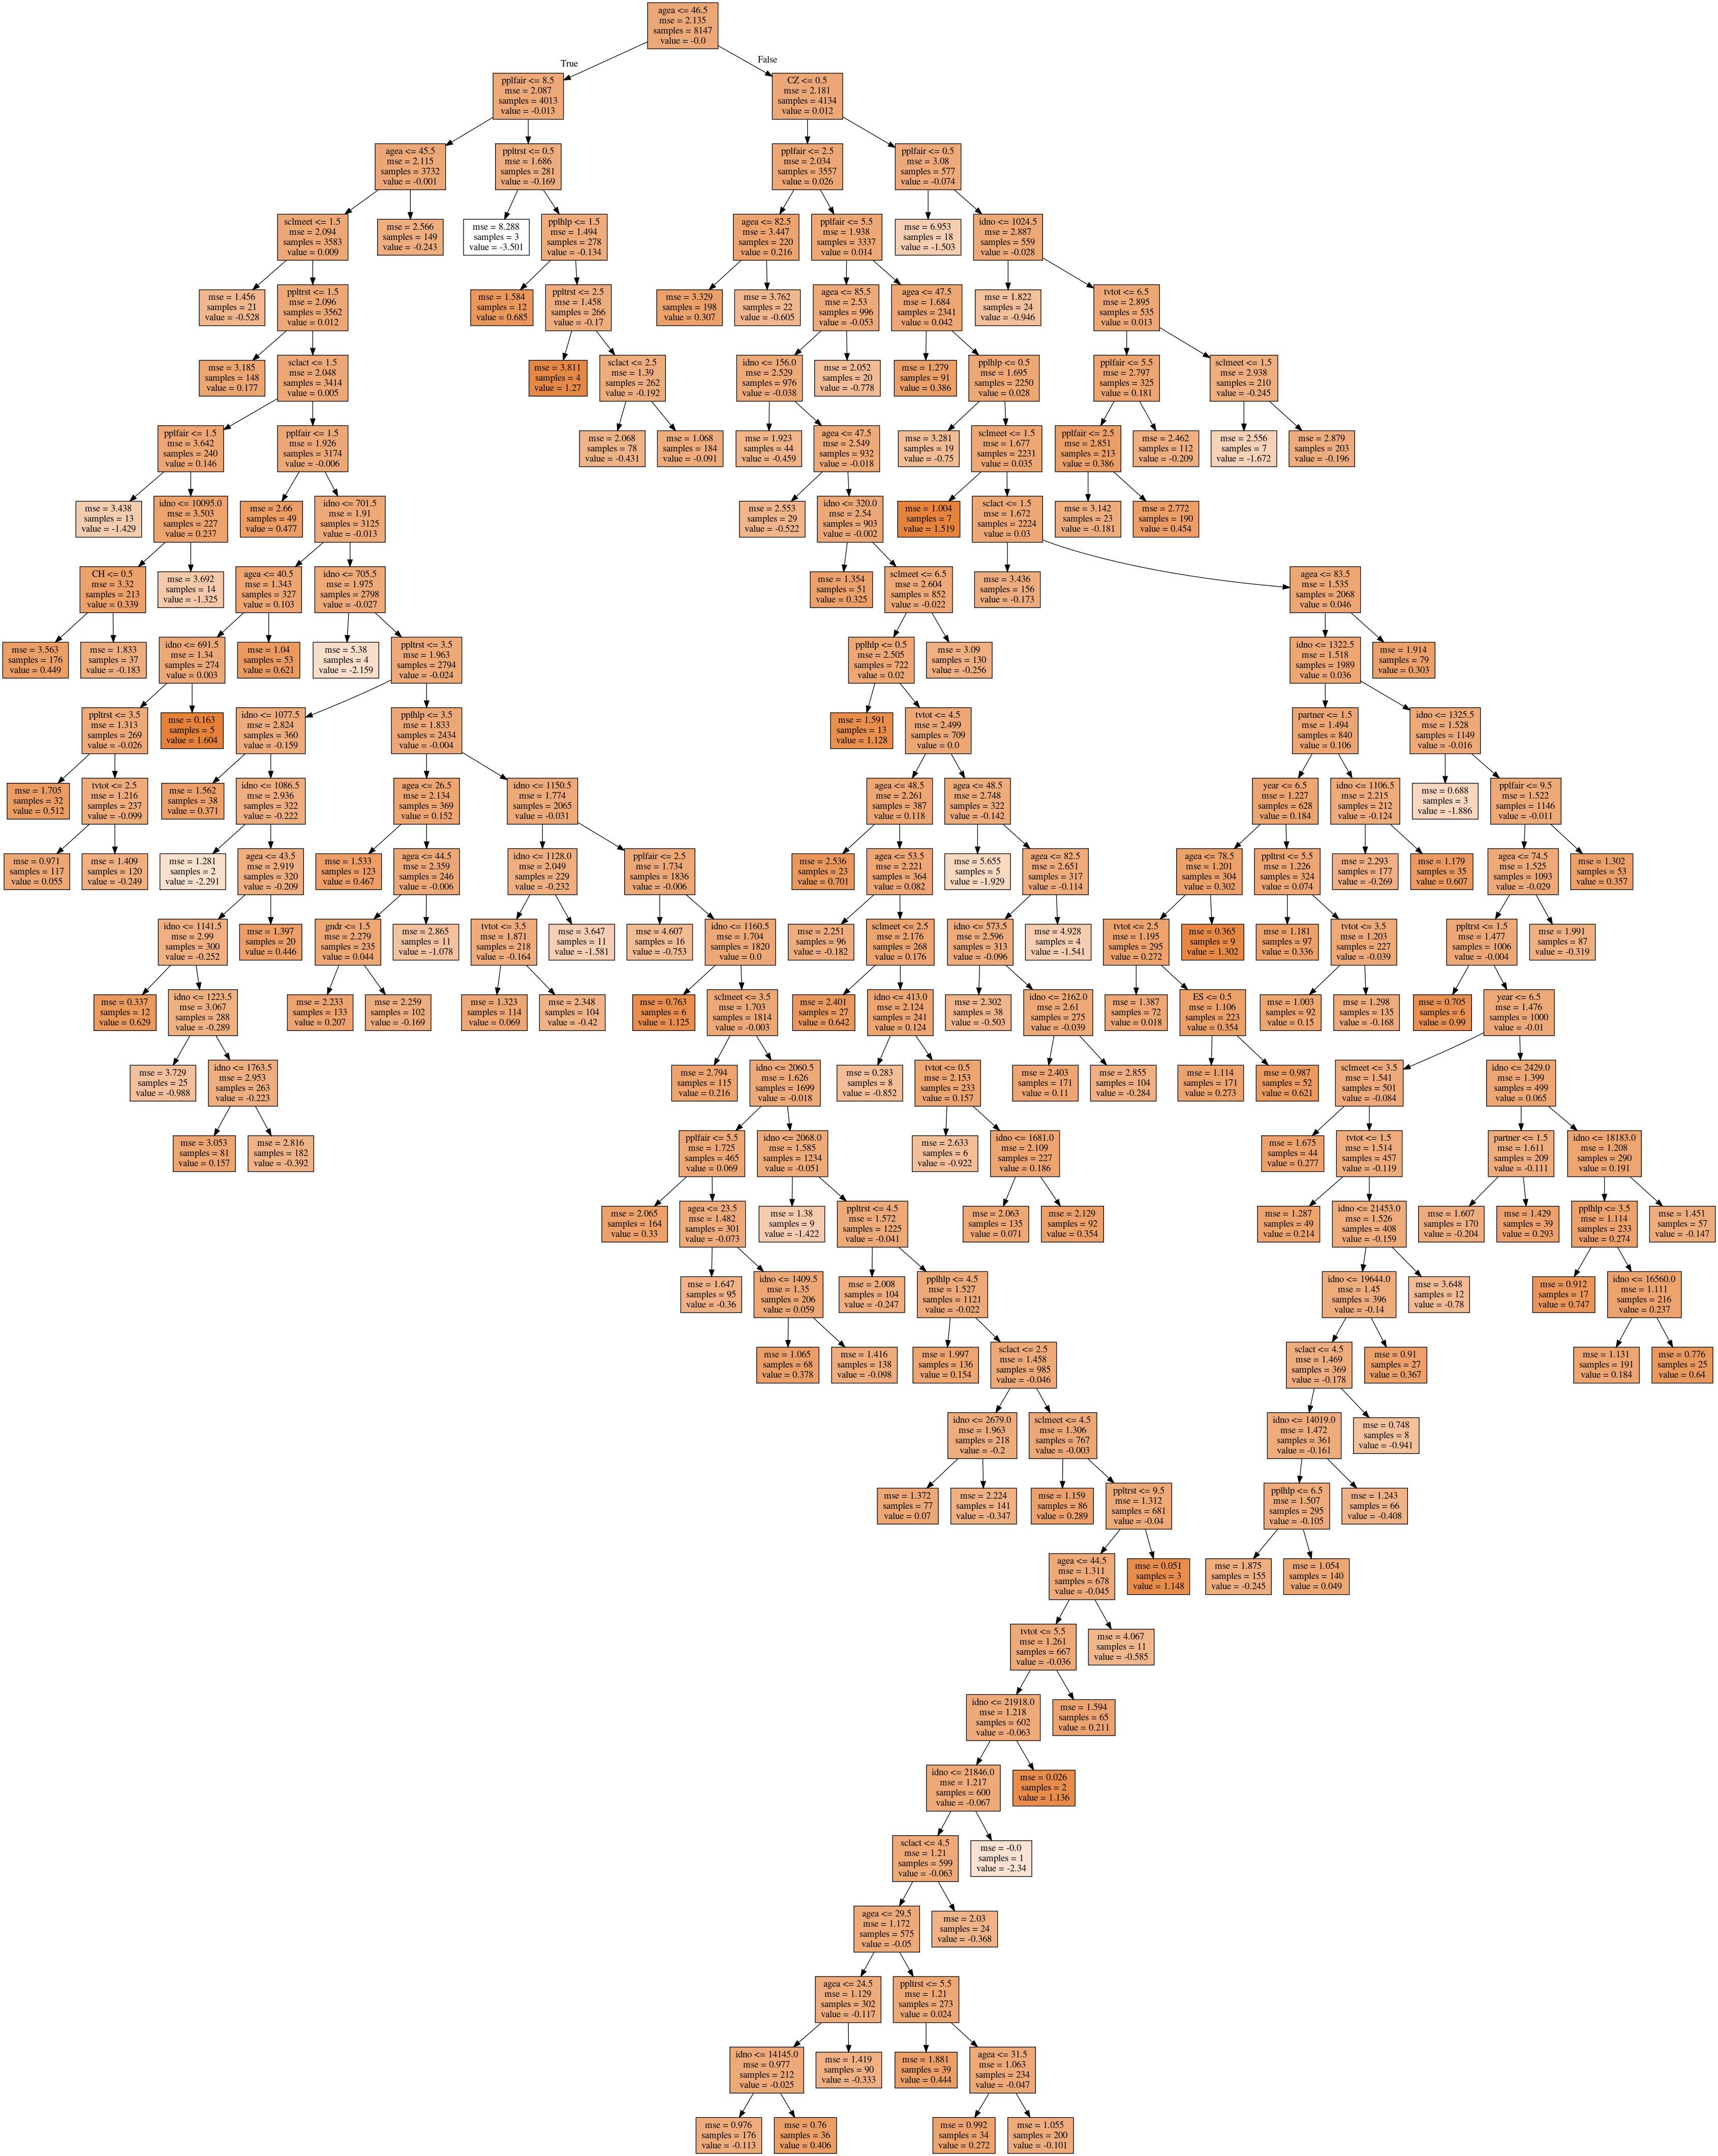

In [6]:
# One big tree. Each node split will include at lest 2.5% of the total sample.
decision_tree = tree.DecisionTreeRegressor(min_samples_split=.025)
decision_tree.fit(X,y)

#Get and store predicted values.
pred = decision_tree.predict(X)
print('One strongish learner R^2: {}'.format(decision_tree.score(X, y)))

dot_data = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=X.columns,  
                                filled=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())  

In [7]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [9]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


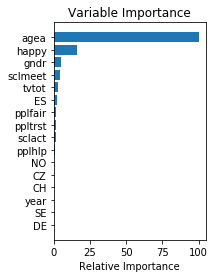

In [10]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Drill

###### Creating new features

In [11]:
X_col_subset = X.loc[:, ~X.columns.isin(['year'])]
X_col_subset['log_agea'] = np.log(X['agea'])
X_col_subset.head()

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE,log_agea
0,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0,4.094345
1,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0,4.077537
2,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0,3.178054
3,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0,4.158883
4,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0,4.007333


In [12]:
for first in range(len(X_col_subset.columns)):
    start = X_col_subset.columns[first]
    for col in X_col_subset.columns[first:]:
        if start in ['agea', 'happy', 'log_agea'] or col in ['agea', 'happy', 'log_agea']:
            X[start + '_' + col] = X_col_subset[start] * X_col_subset[col]
        else:
            pass

In [13]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,...,agea_NO,agea_SE,agea_log_agea,CH_log_agea,CZ_log_agea,DE_log_agea,ES_log_agea,NO_log_agea,SE_log_agea,log_agea_log_agea
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,...,0.0,0.0,245.660674,4.094345,0.0,0.0,0.0,0.0,0.0,16.763657
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,...,0.0,0.0,240.574709,4.077537,0.0,0.0,0.0,0.0,0.0,16.626312
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,...,0.0,0.0,76.273292,3.178054,0.0,0.0,0.0,0.0,0.0,10.100026
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,...,0.0,0.0,266.168517,4.158883,0.0,0.0,0.0,0.0,0.0,17.296309
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,...,0.0,0.0,220.403325,4.007333,0.0,0.0,0.0,0.0,0.0,16.058719


In [14]:
X.columns

Index(['year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet',
       'sclact', 'gndr', 'agea', 'CH', 'CZ', 'DE', 'ES', 'NO', 'SE',
       'tvtot_happy', 'tvtot_agea', 'tvtot_log_agea', 'ppltrst_happy',
       'ppltrst_agea', 'ppltrst_log_agea', 'pplfair_happy', 'pplfair_agea',
       'pplfair_log_agea', 'pplhlp_happy', 'pplhlp_agea', 'pplhlp_log_agea',
       'happy_happy', 'happy_sclmeet', 'happy_sclact', 'happy_gndr',
       'happy_agea', 'happy_CH', 'happy_CZ', 'happy_DE', 'happy_ES',
       'happy_NO', 'happy_SE', 'happy_log_agea', 'sclmeet_agea',
       'sclmeet_log_agea', 'sclact_agea', 'sclact_log_agea', 'gndr_agea',
       'gndr_log_agea', 'agea_agea', 'agea_CH', 'agea_CZ', 'agea_DE',
       'agea_ES', 'agea_NO', 'agea_SE', 'agea_log_agea', 'CH_log_agea',
       'CZ_log_agea', 'DE_log_agea', 'ES_log_agea', 'NO_log_agea',
       'SE_log_agea', 'log_agea_log_agea'],
      dtype='object')

In [20]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [21]:
def gbdt_testing(learning_rate=0.1, n_estimators=500, subsample=1, 
                 max_depth=2, loss='deviance', random_state=101):
    params2 = {'learning_rate': learning_rate,
               'n_estimators': n_estimators,
               'subsample': subsample,
               'max_depth': max_depth,
               'loss': loss}

    # Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params2)
    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

    print((
        'Training set accuracy:\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n\n'
        'Test set accuracy:\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}'
    ).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
    
    return clf

###### I was unable to reduce Type I errors in the test set until I scanned through this article:
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [22]:
clf = gbdt_testing(learning_rate=0.14, n_estimators=100, subsample=0.95, max_depth=3, loss='deviance')

Training set accuracy:
Percent Type I errors: 0.037779596290234585
Percent Type II errors: 0.16393889798145117

Test set accuracy:
Percent Type I errors: 0.06134969325153374
Percent Type II errors: 0.19386503067484662


In [36]:
clf = gbdt_testing(learning_rate=0.13, n_estimators=80, subsample=0.97, max_depth=3, loss='deviance')

Training set accuracy:
Percent Type I errors: 0.040370976541189305
Percent Type II errors: 0.1691216584833606

Test set accuracy:
Percent Type I errors: 0.053987730061349694
Percent Type II errors: 0.18159509202453988


######  Errors from original model:
   > Training set accuracy:
     - Percent Type I errors: 0.04650845608292417
     - Percent Type II errors: 0.17607746863066012

   > Test set accuracy:
     - Percent Type I errors: 0.06257668711656442
     - Percent Type II errors: 0.18527607361963191


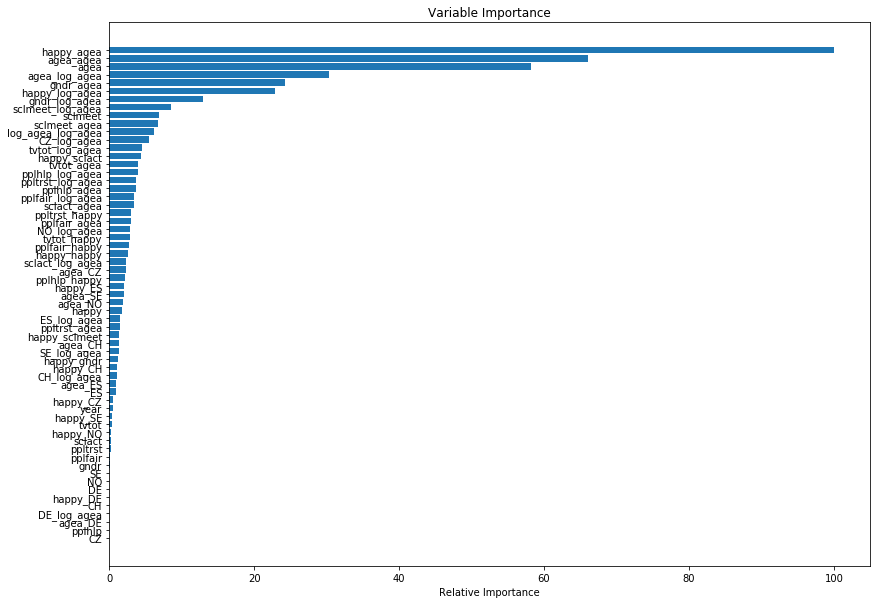

In [37]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(30,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()